In [1]:
import pyzx as zx
import os
path = os.path.join('circuits', 'after', 'circuit_training')
circuit_list = []
for i in range(0,8):
    circuit_list.append(zx.Circuit.from_qasm_file(os.path.join(path,"output_circuit"+str(i)+".qasm")))



In [20]:
import pyzx as zx
import os
path = os.path.join('circuits', 'before', 'SrH_files')
geometries_6q = ["1.9961","2.1461", "2.1961", "2.3461"]
circuits=[]
for geo in geometries_6q:
    circ = zx.Circuit.from_qasm_file(os.path.join(path,"SrH_6q_"+geo+".qasm")).to_basic_gates()
    graph = circ.to_graph()         
    circuits.append(zx.optimize.basic_optimization(zx.Circuit.from_graph(graph.copy()).split_phase_gates()))

for c in circuits:
    print(c.stats(),"depth:", c.depth())

cz = zx.Circuit.from_qasm_file(os.path.join(path,"rzz_circ.qasm")).to_basic_gates()
zx.draw(cz.to_graph())

Circuit  on 6 qubits with 310 gates.
        18 is the T-count
        292 Cliffords among which
        116 2-qubit gates (102 CNOT, 14 other) and
        76 Hadamard gates. depth: 201
Circuit  on 6 qubits with 89 gates.
        22 is the T-count
        67 Cliffords among which
        43 2-qubit gates (39 CNOT, 4 other) and
        13 Hadamard gates. depth: 63
Circuit  on 6 qubits with 260 gates.
        18 is the T-count
        242 Cliffords among which
        101 2-qubit gates (93 CNOT, 8 other) and
        58 Hadamard gates. depth: 163
Circuit  on 6 qubits with 310 gates.
        18 is the T-count
        292 Cliffords among which
        116 2-qubit gates (102 CNOT, 14 other) and
        76 Hadamard gates. depth: 201


In [15]:
import pyzx as zx
from fractions import Fraction

graph= zx.generate.generate_cquere(qubits=6,depth=160,p_t=0.08, p_cz=0.08, p_cnot=0.33, p_s_prob=0.2)
circuit = zx.Circuit.from_graph(graph)
print(circuit.stats())
print(circuit.depth())
count1,count = 0,0
for key,value in circuit.to_graph().phases().items():
    if value == Fraction(1,2):
        count += 1
    elif value == Fraction(3,2):
        count1 += 1

print("pi/2:", count, "3pi/2:", count1)


Circuit  on 6 qubits with 272 gates.
        8 is the T-count
        264 Cliffords among which
        121 2-qubit gates (112 CNOT, 9 other) and
        0 Hadamard gates.
136
pi/2: 85 3pi/2: 58


In [9]:
from fractions import Fraction
pi_2,pi_list,pi_3 = [],[],[]
for c in circuits:
    
    pi2,pi,pi3=0,0,0
    for key,value in c.to_graph().phases().items():
        if value == Fraction(1,2):
            pi2 +=1
        elif value == Fraction(1,1):
            pi +=1
        elif value == Fraction(3,2):
            pi3+=1
    pi_2.append(pi2)
    pi_list.append(pi)
    pi_3.append(pi3)


In [12]:
print(pi_2)
print(pi_list)
print(pi_3)

[53, 4, 49, 53]
[0, 3, 0, 0]
[47, 4, 34, 47]


In [9]:

for c in circuits:
    qubits = [0,0,0,0,0,0]
    for key,value in c.to_graph().qubits().items():
        qubits[value] += 1
    print(qubits)


[87, 50, 85, 83, 63, 70]
[26, 31, 32, 18, 17, 20]
[42, 70, 53, 74, 31, 103]
[87, 50, 85, 83, 63, 70]


In [10]:
geometries_10q = ["1.9461","1.9961","2.0461","2.0961","2.1961","2.2461", "2.2961", "2.3461"]
circuits=[]
for geo in geometries_10q:
    circ = zx.Circuit.from_qasm_file(os.path.join(path,"SrH_10q_"+geo+".qasm"))
    graph = circ.to_graph()         
    circuits.append(zx.optimize.basic_optimization(zx.Circuit.from_graph(graph.copy()).split_phase_gates()))

for c in circuits:
    print(c.stats())

Circuit  on 10 qubits with 515 gates.
        24 is the T-count
        491 Cliffords among which
        204 2-qubit gates (179 CNOT, 25 other) and
        110 Hadamard gates.
Circuit  on 10 qubits with 515 gates.
        24 is the T-count
        491 Cliffords among which
        204 2-qubit gates (179 CNOT, 25 other) and
        110 Hadamard gates.
Circuit  on 10 qubits with 515 gates.
        24 is the T-count
        491 Cliffords among which
        204 2-qubit gates (179 CNOT, 25 other) and
        110 Hadamard gates.
Circuit  on 10 qubits with 515 gates.
        24 is the T-count
        491 Cliffords among which
        204 2-qubit gates (179 CNOT, 25 other) and
        110 Hadamard gates.
Circuit  on 10 qubits with 387 gates.
        24 is the T-count
        363 Cliffords among which
        167 2-qubit gates (157 CNOT, 10 other) and
        74 Hadamard gates.
Circuit  on 10 qubits with 387 gates.
        24 is the T-count
        363 Cliffords among which
        167 2-qubi

In [2]:
import pyzx as zx
import os
path = os.path.join('circuits', 'after')
circuit = zx.Circuit.from_qasm_file(os.path.join(path, "10q-SrH-ckt-opt.qasm"))

In [3]:
for i, circuit in enumerate(circuit_list):
    data = circuit.stats_dict()
    print(f"Circuit {i} has {data['gates']} gates and {data['twoqubit']} two-qubit gates")


Circuit 0 has 38 gates and 21 two-qubit gates
Circuit 1 has 38 gates and 21 two-qubit gates
Circuit 2 has 41 gates and 23 two-qubit gates
Circuit 3 has 40 gates and 21 two-qubit gates
Circuit 4 has 39 gates and 20 two-qubit gates
Circuit 5 has 40 gates and 21 two-qubit gates
Circuit 6 has 41 gates and 20 two-qubit gates
Circuit 7 has 34 gates and 19 two-qubit gates


In [5]:

for i in range(0,8):
    circ = zx.Circuit.from_qasm_file(os.path.join(path,"output_circuit"+str(i)+".qasm"))
    original_circ = zx.Circuit.from_qasm_file("/home/jnogue/qilimanjaro/Copt-cquere/rl-zx/cquere/circuits/before/ckt2.qasm")
    print(original_circ.verify_equality(circ, up_to_swaps=True))
   



True
False
False
False
False
False
False
False


In [13]:
for i in range(0,8):
    circ7 = zx.Circuit.from_qasm_file(os.path.join(path,"output_circuit"+str(i)+".qasm"))
    graph = circ7.to_graph()
    original_circ = zx.Circuit.from_qasm_file("/home/jnogue/qilimanjaro/Copt-cquere/rl-zx/cquere/circuits/before/ckt2.qasm")
    graph1 = original_circ.to_graph()
    print(zx.compare_tensors(graph,graph1))

False
False
False
False
False
False
False
True


In [6]:
import pyzx as zx
import os
path = os.path.join('circuits', 'after', 'circuit_training')
path_original = os.path.join('circuits', 'before')
circ = zx.Circuit.from_qasm_file(os.path.join(path,"opt-ckt2.qasm")) #we switched the qubits labels manually
original_circ = zx.Circuit.from_qasm_file(os.path.join(path_original,"ckt2.qasm"))
circ7 = zx.Circuit.from_qasm_file(os.path.join(path,"output_circuit7.qasm")) #has swaps incorporated

print(zx.compare_tensors(circ.to_graph(),original_circ.to_graph()))
print(zx.compare_tensors(circ7.to_graph(),circ.to_graph()))
print(zx.compare_tensors(circ7.to_graph(),original_circ.to_graph()))



False
False
True


In [10]:
print(ckt10.stats_dict())
graph = ckt10.to_graph()

basic_circ = zx.optimize.basic_optimization(zx.Circuit.from_graph(graph.copy()).split_phase_gates())
graph2 = basic_circ.to_graph(
)
print(zx.compare_tensors(graph,graph2))

print(basic_circ.stats_dict())

{'name': '10q-SrH-ckt.qasm', 'qubits': 10, 'gates': 519, 'tcount': 24, 'clifford': 495, 'twoqubit': 176, 'cnot': 176, 'had': 0, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
True
{'name': '', 'qubits': 10, 'gates': 387, 'tcount': 24, 'clifford': 363, 'twoqubit': 167, 'cnot': 157, 'had': 74, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


In [1]:
import sys, os, time
sys.path.append('../..')
import pyzx as zx
from benchmarking import Benchmark

In [2]:
b = Benchmark()
b.load_circuits(dirname=os.path.join('..','..','rl-zx', 'cquere', 'circuits', 'before'), group_name='fast')

In [ ]:
def basic_optimise(c):
    c1 = zx.basic_optimization(c.copy().split_phase_gates()).to_basic_gates()
    c2 = zx.basic_optimization(c.copy().split_phase_gates(), do_swaps=True).to_basic_gates()
    if c2.twoqubitcount() < c1.twoqubitcount(): return c2 # As this optimisation algorithm is targetted at reducting H-gates, we use the circuit with the smaller 2-qubit gate count here, either using SWAP rules or not.
    return c1
def flow_opt(c):
    g = c.to_graph()
    zx.teleport_reduce(g)
    zx.to_graph_like(g)
    zx.flow_2Q_simp(g)
    c2 = zx.extract_simple(g).to_basic_gates()
    return basic_optimise(c2)
def full_reduce(c):
    g = c.to_graph()
    zx.teleport_reduce(g)
    zx.full_reduce(g, quiet=True)
    c2 = zx.extract_circuit(g).to_basic_gates()
    return basic_optimise(c2)
def gflow_opt(c):
    g = c.to_graph()
    zx.teleport_reduce(g)
    zx.to_graph_like(g)
    zx.simplify.greedy_simp(g)
    c2 = zx.extract_circuit(g).to_basic_gates()
    return basic_optimise(c2)


In [4]:
b.add_simplification_func(func=full_reduce, name='full_reduce', groups_to_run=None, verify=True, rerun=False)
b.add_simplification_func(func=flow_opt, name='flow_opt', groups_to_run=None, verify=True, rerun=False)
b.add_simplification_func(func=gflow_opt, name='gflow_opt', groups_to_run=None, verify=True, rerun=False)
b.run(funcs_to_run=['all'], groups_to_run=['fast'], verify=True, rerun=False)

Processing gflow_opt on ckt1                                          : 100%|██████████| 3/3 [00:07<00:00,  2.62s/it]


In [5]:
df = b.df(groups=['fast'], routines=['all'], funcs=['all'], atts=['Qubits','Gates', '2Q Count','T Count'])

/home/jnogue/miniconda3/envs/app-sdk/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


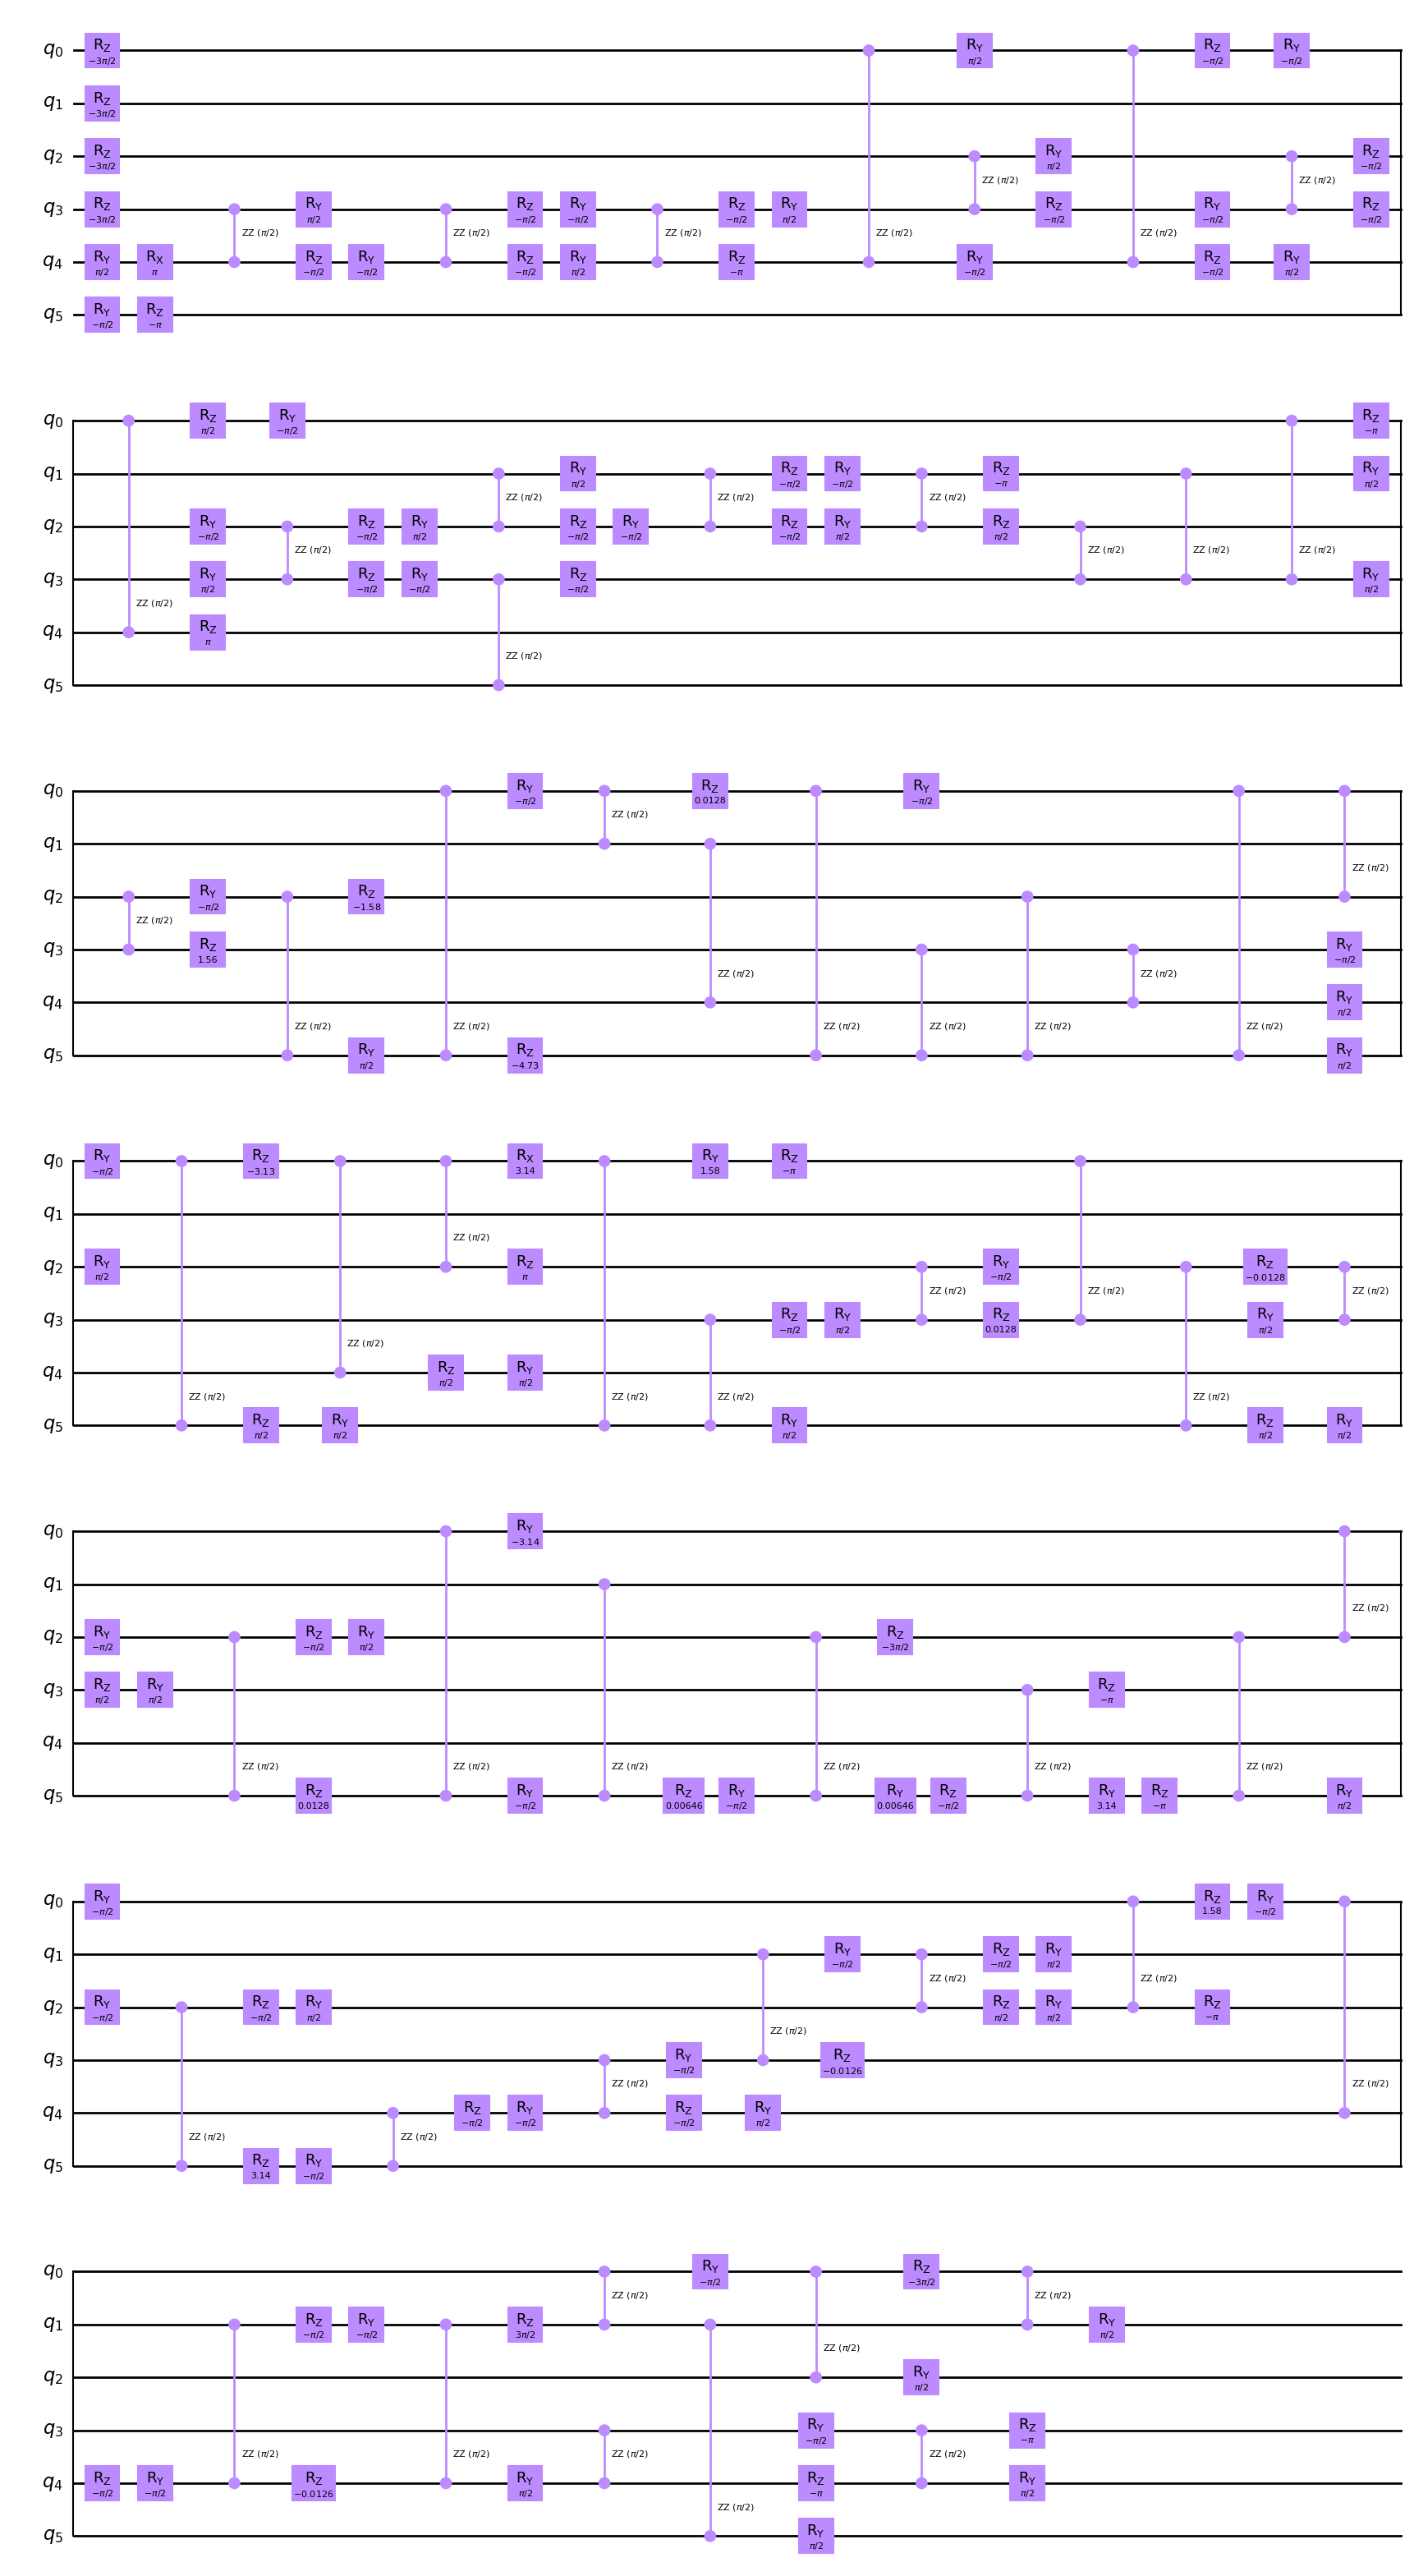

In [1]:
from qiskit import QuantumCircuit, Aer, execute
import qiskit_aer
import numpy as np
from qiskit.quantum_info import Operator
import os

path = os.path.join('circuits', 'before', 'SrH_files')
geometries_6q = ["1.9961","2.1461", "2.1961", "2.3461"]
circuits=[]
for geo in geometries_6q:
    circ = QuantumCircuit.from_qasm_file(os.path.join(path,"SrH_6q_"+geo+".qasm"))
    circuits.append(circ)

circuits[0].draw(output='mpl')
